In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras import regularizers
from sklearn.metrics import f1_score
import numpy as np
import time
import pickle

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./model_data/model_data_fb.csv')
X = df.drop(columns='firstblood_blue')
y = df['firstblood_blue']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)

In [3]:
def model_func(layer_one_neurons=32, layer_one_dropout=.2, layer_two_neurons=32,layer_two_dropout=20,layer_three_neurons=20):
    # print('layer_one_neurons', layer_one_neurons)
    model = Sequential()
    model.add(Dense(layer_one_neurons, activation='relu', input_dim=X_train.shape[1],kernel_regularizer=regularizers.l2()))
    model.add(Dropout(layer_one_dropout))
    model.add(Dense(layer_two_neurons, activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(Dropout(layer_two_dropout))
    model.add(Dense(layer_three_neurons, activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc'])
    return model
nn = KerasRegressor(build_fn=model_func, batch_size=512, verbose=0)
params = {
    'epochs': [10],
    'layer_one_neurons': [30,34,36],
    'layer_two_neurons': [24,26,28],
    'layer_three_neurons': [20,25,15],
    'layer_one_dropout': [.3,.35,.4],
    'layer_two_dropout': [.3,.35,.4]
}
gs = GridSearchCV(nn, param_grid=params, cv=2)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

-0.8263047145068114


{'epochs': 10,
 'layer_one_dropout': 0.3,
 'layer_one_neurons': 36,
 'layer_three_neurons': 15,
 'layer_two_dropout': 0.4,
 'layer_two_neurons': 24}

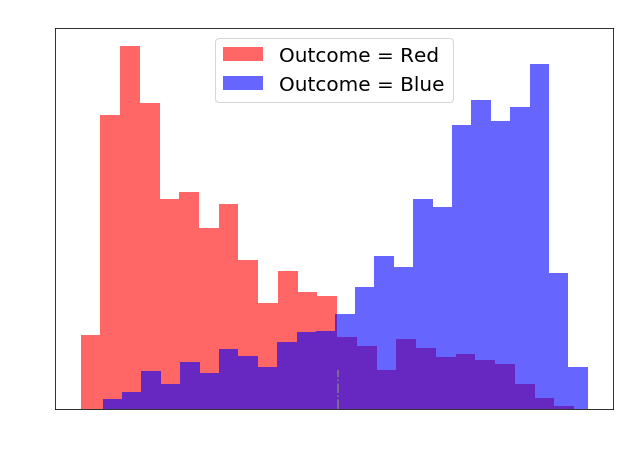

In [6]:
pred_proba = [i for i in gs.best_estimator_.predict(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'r',
         alpha = 0.6,
         label = 'Outcome = Red')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = Blue')
plt.vlines(x=.5,
          ymin=0,
          ymax=25,
          color='grey',
          linestyle='dashdot')

# Label axes.
plt.title('Distribution of P(Outcome = Blue win)', fontsize = 22,color='white')
plt.ylabel('Frequency', fontsize = 18,color='white')
plt.xlabel('Predicted Probability that Outcome = Blue win', fontsize = 18,color = 'white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
# Create legend.
plt.legend(fontsize = 20);
#Thank you Matt for the code from our lecture!
#plt.savefig('log_plot.png');